<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/BenjGaskU8Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [2]:
!pip install pymc-bart
import pymc_bart as pmb

I wanted to do an NBA data set, as playoffs are coming up, and basketball is my favorite sport. I have done previous PPG analysis before, but I wanted to use much mpore complicated and advanced stats for this analysis. It uses the first 81 games of this NBA season to estimate PPG based on a number of advanced statistics.

PPG(Points per game) based on


PER (Player Efficiency Rating):
A number that summarizes a player's overall performance. PER utilizes points per minute adjusted for pace. The stat is base at 15, with every play being given a positive or negative value, calculating a single number. Higher = better all-around stats.

USG% (Usage Rate):
How much a player is involved in the offense when they're on the court. This relates to their ability to score, as someone who has the ball a lot is trusted with bearing the responsibility of scoring. Higher = more touches and shots.

TS% (True Shooting Percentage):
A shooting efficiency stat that includes 2s, 3s, and free throws. This stat accounts for the difference in difficulty of different levels of shots, with 3s being weighted more than 2s, and 2s being weighted mor ethan free throws.Higher = more efficient scorer.

OWS (Offensive Win Shares):
Estimates how many wins a player contributes to their team through offense. This stat is calculated by using there individual offensive output versus the average player divided by their teams average offensive output. This utilizes time played and efficiency while other stats like PPG can't calculate for that.

FTr (Free Throw Rate):
How often a player gets to the free throw line compared to how often they shoot. Free Throws are a common method of scoring, witih many perennial MVP candidates heavily utilizing the free throw line to score(SGA and Joel Embiid). Higher = draws more fouls.

BPM (Box Plus-Minus):
Estimates a player’s overall impact on the game per 100 possessions. This plu-minus is the differenc eof the game when they are on the court, adjusted for total number of possesions when they ar eon the court. Positive = team scores better when on the court.

MPG (Minutes per Game):
How many minutes a player averages per game.

3PAr (3-Point Attempt Rate):
The percentage of a player’s shots that are 3-pointers. Higher = shoots more threes.



In [3]:
bballAdvanced = pd.read_csv('https://raw.githubusercontent.com/benji555-create/Data-Science/refs/heads/main/NBA%20Advanced%20Dataset%20-%20Sheet1.csv', header=0)
bballAdvanced

,Rk,Player,PTS,Age,Team,Pos,G,GS,MP,PER,...,TOVp,USGp,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Mikal Bridges,1427,28,NYK,SF,80,80,3000,14.0,...,9.8,19.6,3.6,2.0,5.5,0.088,0.3,-0.9,-0.6,1.1
1,2,Josh Hart,1043,29,NYK,SG,76,76,2862,16.5,...,15.4,15.3,5.4,3.8,9.2,0.154,1.1,1.8,2.8,3.5
2,3,Anthony Edwards,2125,23,MIN,SG,77,77,2800,20.0,...,12.2,31.4,4.4,3.6,8.0,0.137,4.3,-0.1,4.2,4.4
3,4,Devin Booker,1905,28,PHO,SG,74,74,2767,19.3,...,11.8,29.3,6.0,0.3,6.3,0.109,2.8,-2.4,0.4,1.6
4,5,Tyler Herro,1818,25,MIA,SG,76,76,2704,19.5,...,11.5,28.1,4.4,2.7,7.1,0.126,3.7,-0.7,3.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Neemias Queta,301,21,PHI,C,56,9,841,16.1,...,21.1,14.0,1.2,0.9,2.1,0.118,-3.1,0.1,-2.9,-0.2
296,297,Dereck Lively II,304,25,BOS,C,60,6,825,16.2,...,15.3,13.9,1.8,1.3,3.0,0.175,-1.7,0.8,-0.9,0.2
297,298,Ryan Rollins,342,20,DAL,C,35,28,815,20.0,...,15.6,13.5,2.4,1.0,3.4,0.199,1.1,2.3,3.4,1.1
298,299,Garrison Mathews,341,22,MIL,PG,55,18,802,13.9,...,15.4,18.5,0.6,1.0,1.7,0.100,-1.4,0.9,-0.5,0.3


In [4]:
PPG = (bballAdvanced.PTS/bballAdvanced.G)
MPG = (bballAdvanced.MP/bballAdvanced.G)
bballAdvanced.insert(loc=4, column="PPG", value=PPG)
bballAdvanced.insert(loc=5, column="MPG", value=MPG)
#adding MPG and PPG into the advanced bball stats dataset

In [5]:
bballAdvanced = bballAdvanced[['Player', 'PPG', 'USGp', 'BPM', 'PER', 'TSp', 'FTr', '3PAr', 'MPG']]
bballAdvanced

,Player,PPG,USGp,BPM,PER,TSp,FTr,3PAr,MPG
0,Mikal Bridges,17.837500,19.6,-0.6,14.0,0.585,0.097,0.391,37.500000
1,Josh Hart,13.723684,15.3,2.8,16.5,0.611,0.268,0.326,37.657895
2,Anthony Edwards,27.597403,31.4,4.2,20.0,0.595,0.311,0.501,36.363636
3,Devin Booker,25.743243,29.3,0.4,19.3,0.588,0.342,0.390,37.391892
4,Tyler Herro,23.921053,28.1,3.0,19.5,0.602,0.235,0.488,35.578947
...,...,...,...,...,...,...,...,...,...
295,Neemias Queta,5.375000,14.0,-2.9,16.1,0.709,0.517,0.006,15.017857
296,Dereck Lively II,5.066667,13.9,-0.9,16.2,0.680,0.308,0.015,13.750000
297,Ryan Rollins,9.771429,13.5,3.4,20.0,0.703,0.397,0.000,23.285714
298,Garrison Mathews,6.200000,18.5,-0.5,13.9,0.598,0.169,0.440,14.581818


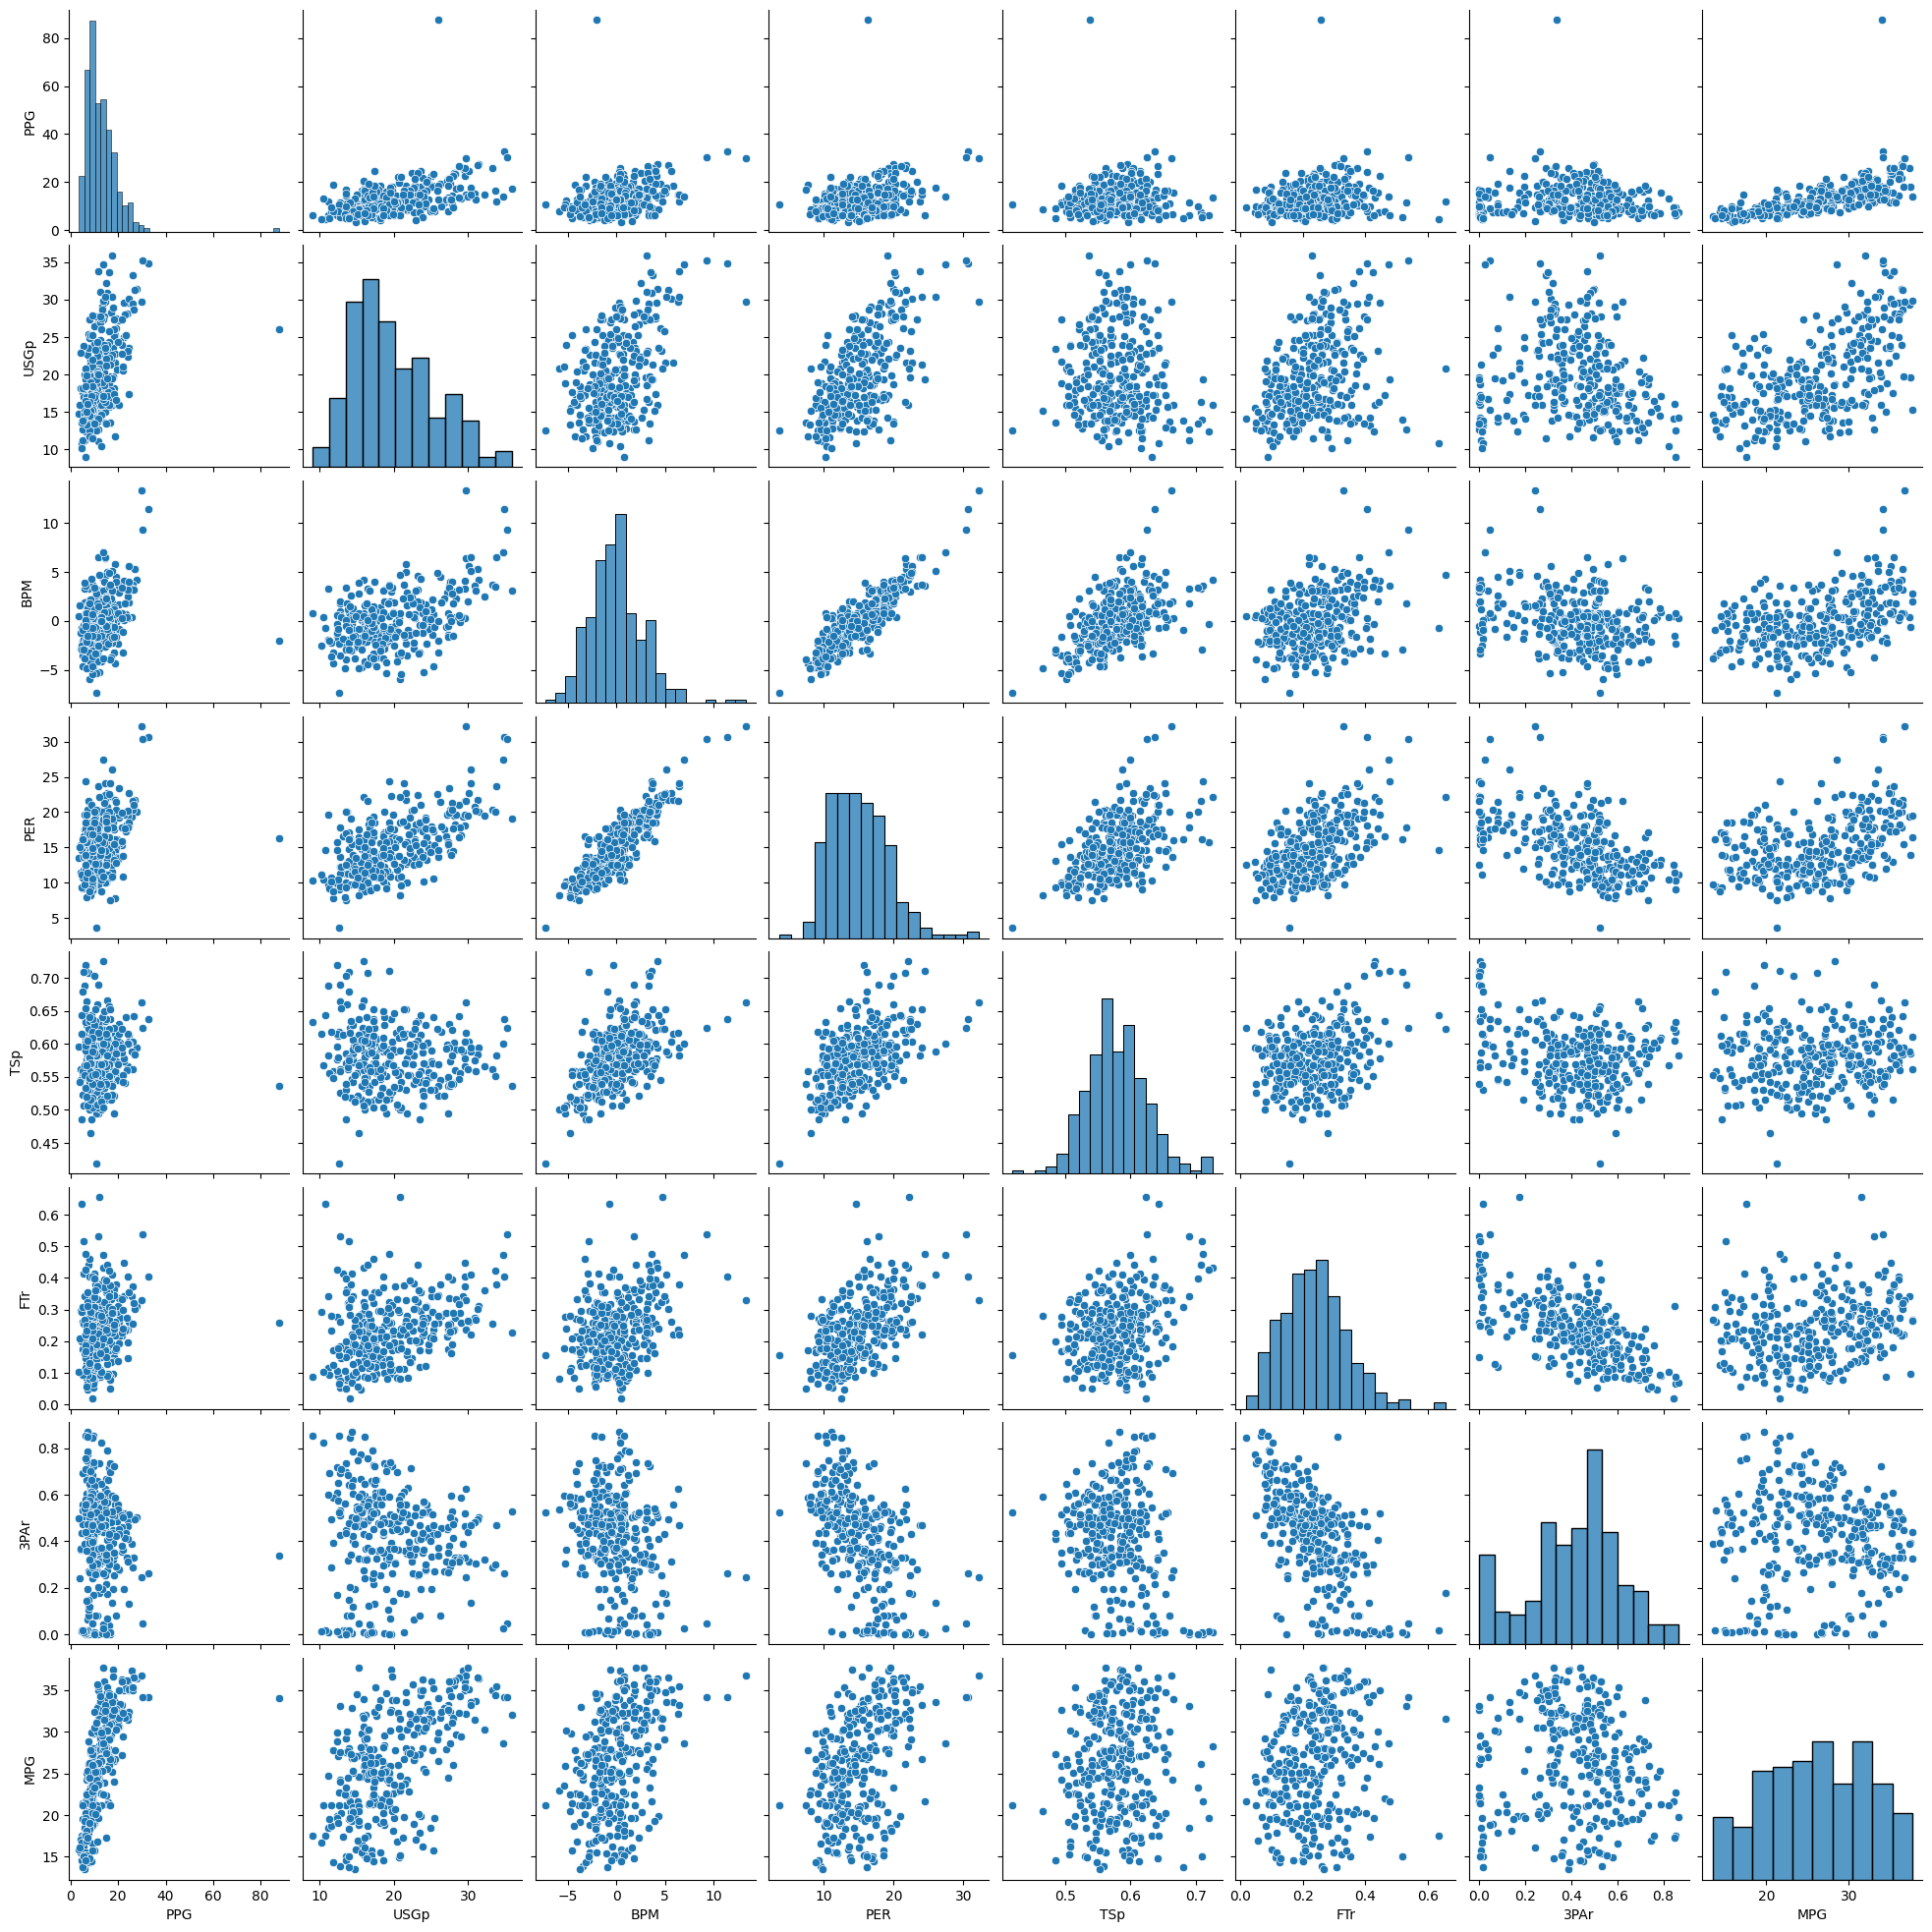

In [6]:
sns.pairplot(bballAdvanced)

In [7]:
stats = ["USGp", "BPM", "PER", "TSp", "FTr", "3PAr", "MPG"]

X = bballAdvanced[stats]
Y = bballAdvanced["PPG"].to_numpy()

At first I ran a Normal model, and it wasn't terrible.

In [9]:
print(np.std(Y))
#used for calculating sigma value as I had that error that we went over in class.

7.0219345742866635


In [10]:
with pm.Model() as model_NormALL:
    s = pm.HalfNormal('s',14)
    μ = pmb.BART("μ_", X, Y, m=50)
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_NormALL = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

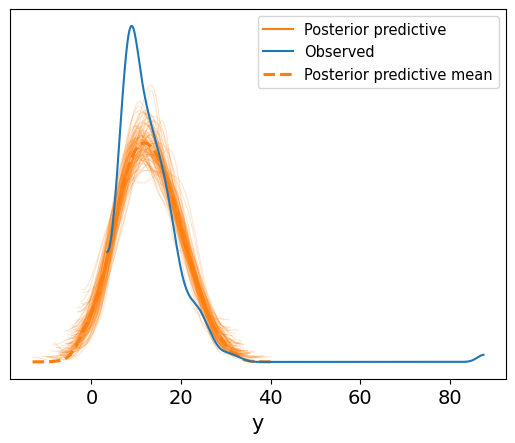

In [11]:
pm.sample_posterior_predictive(idata_NormALL,model_NormALL, extend_inferencedata=True)
az.plot_ppc(idata_NormALL, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [12]:
with pm.Model() as model_PPGall:
    s = pm.HalfNormal('s',14)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Gamma("y", mu=μ, sigma=s,  observed=Y)
    idata_PPGall = pm.sample(compute_convergence_checks=False)


Output()

Output()

<Axes: xlabel='y'>

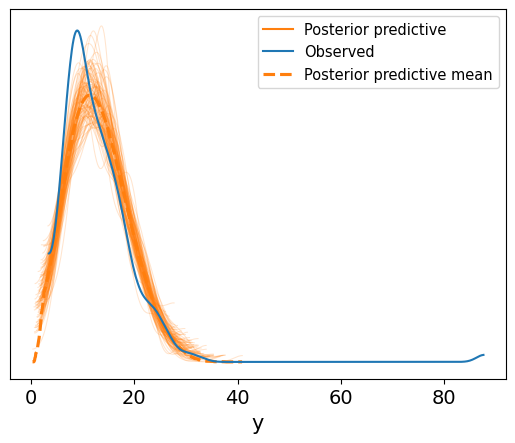

In [13]:
pm.sample_posterior_predictive(idata_PPGall,model_PPGall, extend_inferencedata=True)
az.plot_ppc(idata_PPGall, num_pp_samples=100, colors=["C1", "C0", "C1"])

This one looks great honestly. The Predictive was extremely accurate and doesnt predict any scoreres averagung more than 30 which is good. It also is slightly right and beloe for the low scoring players, which makes sense as there are a lot of players who even I don't know that play spot minutes over a long NBA season.

In [17]:
posterior_mean = idata_PPGall.posterior["μ"]

μ_hdi = az.hdi(ary=idata_PPGall, group="posterior", var_names=["μ"], hdi_prob=0.74)
pps = az.extract(
    idata_PPGall, group="posterior_predictive", var_names=["y"]
).T
Xn = X.to_numpy()

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


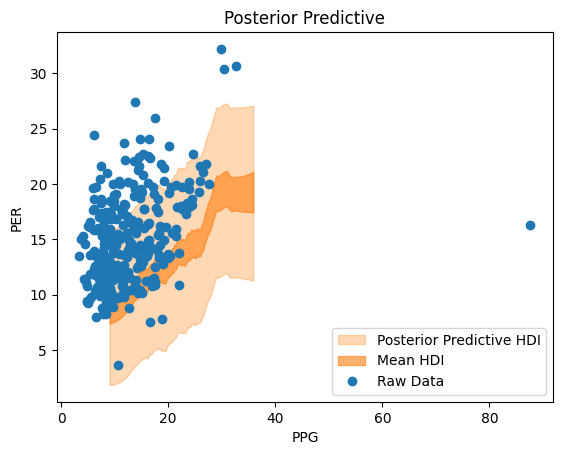

In [19]:
idx = np.argsort(Xn[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=Xn[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive HDI"},
)

az.plot_hdi(
    x=Xn[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean HDI"},
)
ax.plot(bballAdvanced["PPG"], bballAdvanced["PER"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="PPG",
    ylabel="PER",
);


Big outlier there I don't know why that's showing up as someone averaging like 90 PPG?? I'm gonna look at that.

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


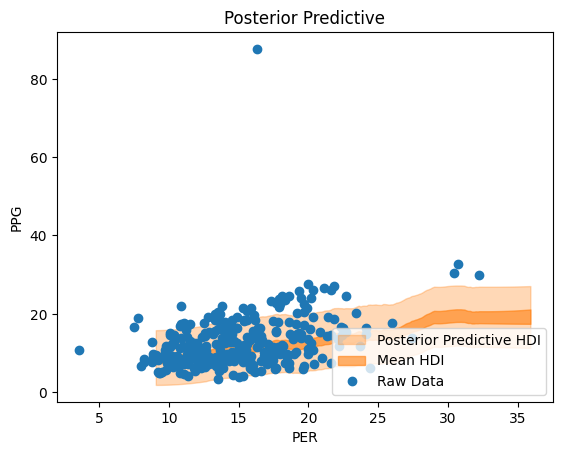

In [23]:
idx = np.argsort(Xn[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=Xn[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive HDI"},
)

az.plot_hdi(
    x=Xn[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean HDI"},
)
ax.plot(bballAdvanced["PER"], bballAdvanced["PPG"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="PER",
    ylabel="PPG",
);


This looks better with PER on the x-axis. It shows a pretty accurate prediction, capturing most data points besides some wild outliers. There is obviuosly players with extremely low PER that still jsut chuck up shots on bad teams, and players that have a ridiculously high PER and PPG that the predictive seems to be missing.

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='USGp'>, <Axes: xlabel='BPM'>, <Axes: xlabel='PER'>,
       <Axes: xlabel='TSp'>, <Axes: xlabel='FTr'>, <Axes: xlabel='3PAr'>,
       <Axes: xlabel='MPG'>], dtype=object)

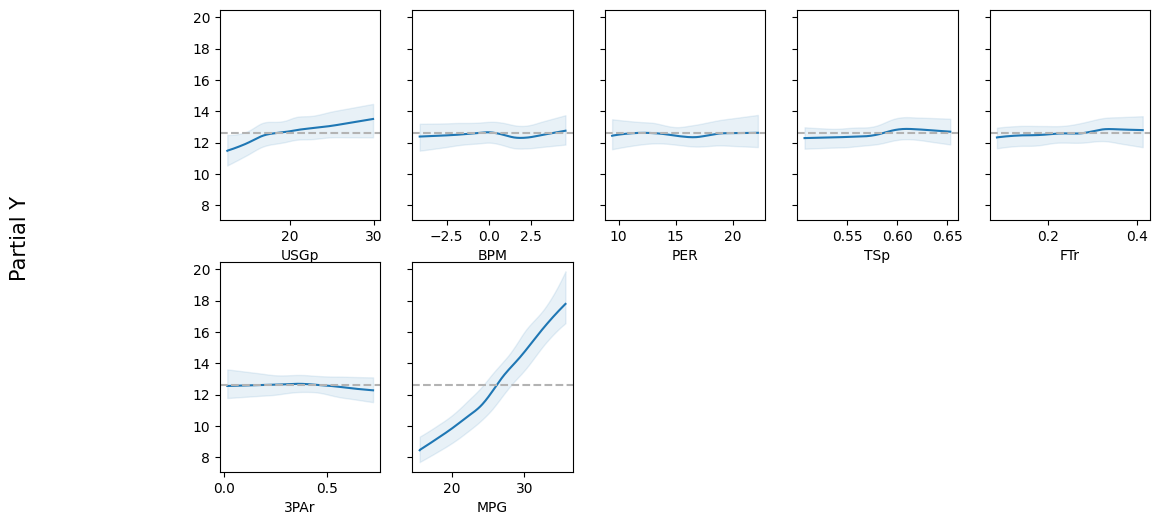

In [20]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='USGp'>, <Axes: xlabel='BPM'>, <Axes: xlabel='PER'>,
       <Axes: xlabel='TSp'>, <Axes: xlabel='FTr'>, <Axes: xlabel='3PAr'>,
       <Axes: xlabel='MPG'>], dtype=object)

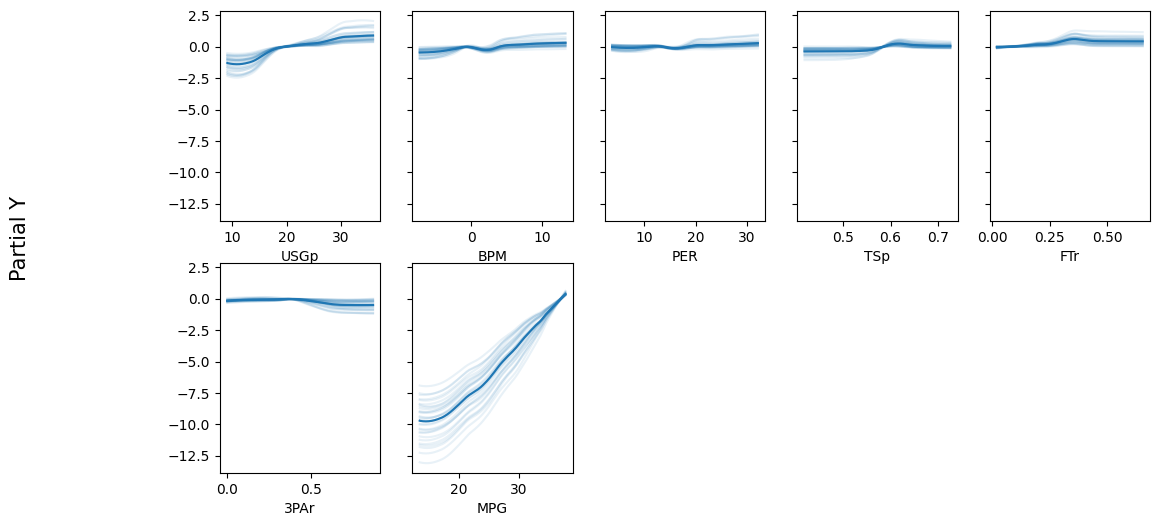

In [21]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

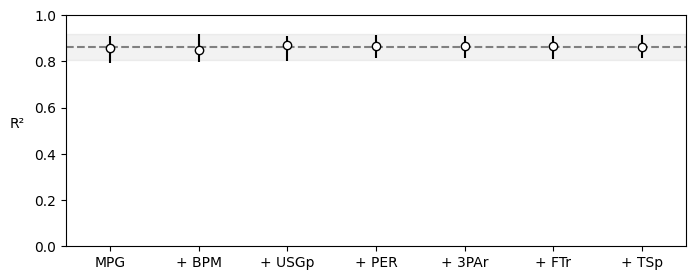

In [22]:
vi_counties = pmb.compute_variable_importance(idata_PPGall, μ_, X)
pmb.plot_variable_importance(vi_counties)

Overall, I'd say the gamma model was certainly a success. It look accurate, and it captures a good amount of the data points, creating a good representative of our data. If restrating I would ceertainly cut some people from the set, as that would defienelty eliminate some outliers, but not all as a lot of these stats account for playing time and Usage.